# LSTMs test

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
import os
%load_ext autoreload
%autoreload 1


#os.chdir(".\\lib")
print(os.getcwd())

import models, ingest, predict

c:\Users\Mikey\Documents\Github\Hysterisis-ML-Modeling\lib


In [2]:

## FLAGS ##
# RAS model output or USGS
USGS_FLAG = True

csv = r"..\data\henry_csv_17-23.csv"
#renames = {'00065': 'Gage Height', '00060': 'Discharge', '72254': 'Velocity'}
renames = {'65': 'Gage Height', '60': 'Discharge', '72254': 'Velocity'}
target = "Discharge"
dataname = "Henry_2017_2020"

train_scaled, test_scaled, train_dates, test_dates, all_dates, scaler = ingest.ingest(csv, target, renames= renames, USGS_FLAG=USGS_FLAG)
                                                                               #train_range= train_range, test_range= test_range)
trainX, trainY = ingest.reshape(train_scaled)#, timestep_type= "hr")
testX, testY = ingest.reshape(test_scaled)#, timestep_type= "hr")


c:\Users\Mikey\Documents\Github\Hysterisis-ML-Modeling\lib\ingest.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_range, test_range = [all_dates[0], all_dates[-1]], [all_dates[0], all_dates[-1]]


In [3]:
'''
model_name =  "Stacked_LSTM"#,'Bidirectional_LSTM','Attention_LSTM', "GRU"]

model = models.prebuilt_models(model_name, trainX, trainY, epochs=2, batch_size= 32)
validation_loss = models.evaluate_model(model, testX, testY)
models.plot_model( model_name, validation_loss)
'''

'\nmodel_name =  "Stacked_LSTM"#,\'Bidirectional_LSTM\',\'Attention_LSTM\', "GRU"]\n\nmodel = models.prebuilt_models(model_name, trainX, trainY, epochs=2, batch_size= 32)\nvalidation_loss = models.evaluate_model(model, testX, testY)\nmodels.plot_model( model_name, validation_loss)\n'

In [4]:
#predict_date_range=['2020-05-15 00:00:00-00:00', '2020-07-01 00:00:00-00:00']
model_name =  "Stacked_LSTM"#,'Bidirectional_LSTM','Attention_LSTM', "GRU"]

predicts = predict.predict(model_name, testX, dataname)



retrieving and loading model
predicting
6221/6221 [==============================] - 248s 40ms/step


In [5]:
%aimport predict
%aimport ingest
%aimport models




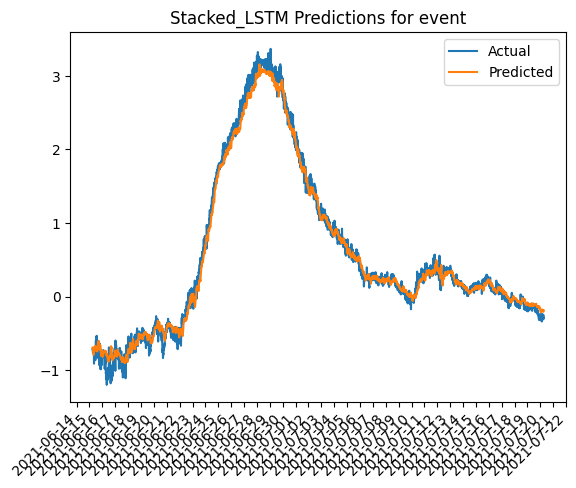

In [6]:
tstart = '2022-03-18 00:00:00-06:00'
tend = '2022-04-07 00:00:00-06:00'


# 3/18/2022 to 7/4/2022



event_range = [tstart, tend]
predict.plot_predicts(model_name, predicts, testY, test_dates, dataname, event_range, event_timestep= "Day" )


In [1]:

predict.plot_predicts("test", predicts, testY, test_dates)


NameError: name 'predict' is not defined

#### Rebuilding predicts plotting


In [7]:
shape = test_dates.shape[0] if predicts.shape[0] > test_dates.shape[0] else predicts.shape[0]


# Add dates to the sets
testY = pd.DataFrame(testY, index= test_dates[:shape])


In [17]:

predicts_test = predicts.astype(np.float64)
predicts_test = pd.DataFrame(predicts_test)

predicts_test["datetime"] = test_dates[:shape].index
predicts_test = predicts_test.set_index("datetime")


In [32]:
event_range = pd.to_datetime(event_range)
t_start = str(event_range[0])
t_end = str(event_range[1])

eventY = testY.loc[t_start : t_end]
eventPredicts = predicts_test.loc[t_start : t_end]


NameError: name 'event_timestep' is not defined

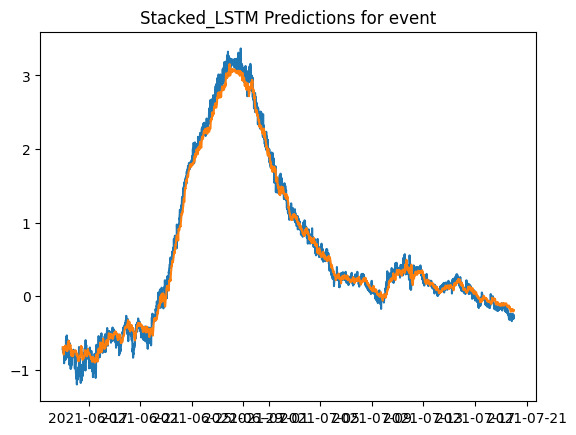

In [37]:
plt.figure()
plt.title(f"{model_name} Predictions for event")
plt.plot(pd.to_datetime(eventY.index), eventY.iloc[:, 0], label='Actual')
plt.plot(pd.to_datetime(eventY.index), eventPredicts.iloc[:, 0], label='Predicted')


# Format the x-axis
ax = plt.gca()
if event_timestep == "Month":
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Display one tick per month
elif event_timestep == "Day":
    ax.xaxis.set_major_locator(mdates.DayLocator())  # Display one tick per day

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set date format

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate the x-axis labels for better visibility

plt.legend()
plt.savefig(fr"model_results/{datamname}/{model_name}/{model_name}_event_predictions.png")  
plt.show()
plt.close()


In [ ]:


'''
model_names = ['Basic_LSTM', 'Stacked_LSTM', 'Bidirectional_LSTM', 'Attention_LSTM']
for model_name in model_names:
    model, history = models.prebuilt_models(model_name, trainX, trainY)
    validation_loss = models.evaluate_model(model, testX, testY)
    models.plot_model(history, model_name, validation_loss)
'''

